# 📊 Data Preprocessing and Feature Engineering

This notebook is part of our graduation project titled:

**"Personalized Points of Interest (POI) Recommendation System for Tourism in the Capital City of Saudi Arabia – Riyadh."**


**Contents**:
- Raw check-in data cleanup
- Normalization and encoding
- Time and location feature extraction
- Feature engineering for category and user behavior

🔴 **Dataset**: Collected manually from Swarm (Foursquare) with ethical approval  
🔴 **Tools**: Python, Pandas, NumPy, Scikit-learn, etc.


## Import Libraries

The necessary libraries for data manipulation and analysis.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from fuzzywuzzy import process, fuzz
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Load the Dataset


In [ ]:
# Load the dataset
file_path ='/content/POI-last.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the data
df.head()

,User ID,Venue ID,Latitude,Longitude,Check-in Time,Day,Previous Venue ID,Venue Name,Venue Category
0,1,V01,24.693367,46.598449,2024-09-11 20:18:00,Wednesday,NaN,BELMONT Coffee House,Coffee Shop
1,1,V02,24.733212,46.645169,2024-09-11 20:42:00,Wednesday,V01,KHOLASA,Coffee Shop
2,1,V03,24.722389,46.678917,2022-08-01 20:39:00,Monday,V05,Shazin,Miscellaneous Store
3,1,V04,24.713180,46.675823,2022-08-01 21:39:00,Monday,V03,SHOE PALACE,Shoe Store
4,1,V05,24.858572,46.646492,2022-07-31 13:47:00,Sunday,V06,Starbucks,Coffee Shop


## Data Cleaning

## Step 1: Remove Trailing Spaces in Column Names
### 1.1 Check for trailing spaces in column names.


In [ ]:
# Check for trailing spaces in column names
print("Column names before removing trailing spaces:")
print(df.columns.tolist())

Column names before removing trailing spaces:
['User ID', 'Venue ID', 'Latitude', 'Longitude', 'Check-in Time', 'Day', 'Previous Venue ID', 'Venue Name', 'Venue Category ']


### 1.2 Remove trailing spaces in column names.


In [ ]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Verify column names after stripping spaces
print("Column names after removing trailing spaces:")
print(df.columns.tolist())

Column names after removing trailing spaces:
['User ID', 'Venue ID', 'Latitude', 'Longitude', 'Check-in Time', 'Day', 'Previous Venue ID', 'Venue Name', 'Venue Category']


## Step 2: Handle Missing Values
### 2.1 Check for missing values in each column.


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Display number of rows before handling missing values
print(f"\nNumber of rows before handling missing values: {len(df)}")

Missing values in each column:
User ID               0
Venue ID              0
Latitude              0
Longitude             0
Check-in Time         0
Day                   0
Previous Venue ID    55
Venue Name            5
Venue Category        2
dtype: int64

Number of rows before handling missing values: 992


### 2.2 Fill missing values where applicable or drop rows if necessary.


In [ ]:
# Fill missing "Previous Venue ID" with "None"
df['Previous Venue ID'].fillna('None', inplace=True)

# # ***just for now -unntill we complete the missing values***
# # Fill missing "Venue Name" with "Unknown"
# df['Venue Name'].fillna('Unknown', inplace=True)

# # Fill missing "Venue Category" with "Unknown"
# df['Venue Category'].fillna('Unknown', inplace=True)

# # Drop rows where 'Venue Name' or 'Venue Category' is missing
df = df.dropna(subset=['Venue Name', 'Venue Category'])

# Verify that missing values have been handled
print(df.isnull().sum())

# Display number of rows after handling missing values
print(f"\nNumber of rows after handling missing values: {len(df)}")

User ID              0
Venue ID             0
Latitude             0
Longitude            0
Check-in Time        0
Day                  0
Previous Venue ID    0
Venue Name           0
Venue Category       0
dtype: int64

Number of rows after handling missing values: 987


<ipython-input-7-e15e91ebf988>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Previous Venue ID'].fillna('None', inplace=True)


## Step 3: Convert Columns to Correct Formats & Ensure Proper ID Handling
### 3.1 Check the data type for each original column.


In [ ]:
# Check the data types of columns
print("Data types before conversion:")
print(df.dtypes)

Data types before conversion:
User ID                       int64
Venue ID                     object
Latitude                    float64
Longitude                   float64
Check-in Time        datetime64[ns]
Day                          object
Previous Venue ID            object
Venue Name                   object
Venue Category               object
dtype: object


### 3.2.1 Convert Check-in Time to datetime format


In [ ]:
# Display the first few rows of the original 'Check-in Time' column
print(f"Original 'Check-in Time' Values: \n{df['Check-in Time'].head()}\n")

# Convert 'Check-in Time' to datetime format
df['Check-in Time'] = pd.to_datetime(df['Check-in Time'], format='%m/%d/%y %H:%M', errors='coerce')

# Display the first few rows of the converted 'Check-in Time' column
print(f"Converted 'Check-in Time' Values: \n{df['Check-in Time'].head()}\n")

# Check for NaT value
nat_count = df['Check-in Time'].isna().sum()
print(f"Number of 'NaT' values after conversion: {nat_count}\n")

# Display rows with NaT values (if any)
if nat_count > 0:
    print("Rows with 'NaT' values:\n")
    print(df[df['Check-in Time'].isna()])

Original 'Check-in Time' Values: 
0   2024-09-11 20:18:00
1   2024-09-11 20:42:00
2   2022-08-01 20:39:00
3   2022-08-01 21:39:00
4   2022-07-31 13:47:00
Name: Check-in Time, dtype: datetime64[ns]

Converted 'Check-in Time' Values: 
0   2024-09-11 20:18:00
1   2024-09-11 20:42:00
2   2022-08-01 20:39:00
3   2022-08-01 21:39:00
4   2022-07-31 13:47:00
Name: Check-in Time, dtype: datetime64[ns]

Number of 'NaT' values after conversion: 0



<ipython-input-9-af3a96dfdc0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Check-in Time'] = pd.to_datetime(df['Check-in Time'], format='%m/%d/%y %H:%M', errors='coerce')




### 3.2.2 Convert User ID, Venue ID, and Previous Venue ID to appropriate types



In [ ]:
df['User ID'] = df['User ID'].astype(int)
df['Venue ID'] = df['Venue ID'].astype(str)
df['Previous Venue ID'] = df['Previous Venue ID'].astype(str)

<ipython-input-10-be09f0f56460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User ID'] = df['User ID'].astype(int)
<ipython-input-10-be09f0f56460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue ID'] = df['Venue ID'].astype(str)
<ipython-input-10-be09f0f56460>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

### 3.2.3 Ensure latitude and longitude have consistent precision


In [ ]:
df['Latitude'] = df['Latitude'].round(6)
df['Longitude'] = df['Longitude'].round(6)

<ipython-input-11-05e6a5c1ac9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = df['Latitude'].round(6)
<ipython-input-11-05e6a5c1ac9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = df['Longitude'].round(6)


### 3.2.5 Clean and Unify the Days Column

In [ ]:
# Display unique values to confirm cleaning
print("Cleaned 'Day' column unique values before cleaning:")
print(df['Day'].unique())

# Strip spaces and ensure the first letter is capitalized
df['Day'] = df['Day'].str.strip()

# Display unique values to confirm cleaning
print("Cleaned 'Day' column unique values after cleaning:")
print(df['Day'].unique())


Cleaned 'Day' column unique values before cleaning:
['Wednesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Tuesday '
 'Wednesday ' 'Tuesday' 'Monday ']
Cleaned 'Day' column unique values after cleaning:
['Wednesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Tuesday']


### 3.3 Verify that column formats have been correctly converted


In [ ]:
# Verify column formats after conversion
print("Data types after conversion:\n", df.dtypes)

# Display a sample of the dataset to confirm
df.head()

Data types after conversion:
 User ID                       int64
Venue ID                     object
Latitude                    float64
Longitude                   float64
Check-in Time        datetime64[ns]
Day                          object
Previous Venue ID            object
Venue Name                   object
Venue Category               object
dtype: object


,User ID,Venue ID,Latitude,Longitude,Check-in Time,Day,Previous Venue ID,Venue Name,Venue Category
0,1,V01,24.693367,46.598449,2024-09-11 20:18:00,Wednesday,None,BELMONT Coffee House,Coffee Shop
1,1,V02,24.733212,46.645169,2024-09-11 20:42:00,Wednesday,V01,KHOLASA,Coffee Shop
2,1,V03,24.722389,46.678917,2022-08-01 20:39:00,Monday,V05,Shazin,Miscellaneous Store
3,1,V04,24.713180,46.675823,2022-08-01 21:39:00,Monday,V03,SHOE PALACE,Shoe Store
4,1,V05,24.858572,46.646492,2022-07-31 13:47:00,Sunday,V06,Starbucks,Coffee Shop


## Step 4: Remove Duplicate Rows
### 4.1 Check for duplicate rows.


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 4.2 Remove any duplicate rows (if any).


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

Number of duplicate rows after removal: 0


## Step 5: Order the Dataset by User ID
### 5.1 Order the rows by User ID.


In [ ]:
# Order the dataset by User ID
df = df.sort_values(by=['User ID', 'Check-in Time'])

# Reset the index after sorting
df = df.reset_index(drop=True)

# Verify the ordering
df.head(50)

,User ID,Venue ID,Latitude,Longitude,Check-in Time,Day,Previous Venue ID,Venue Name,Venue Category
0,1,V231,24.767113,46.659294,2021-01-05 22:31:00,Tuesday,None,Margherita,Italian Restaurant
1,1,V67,24.772194,46.698083,2021-01-05 23:52:00,Tuesday,V231,Riverwalk,Plaza
2,1,V232,24.790579,46.612207,2021-01-06 23:59:00,Wednesday,V67,AMC Cinemas,Movie Theater
3,1,V233,24.760748,46.716174,2021-01-09 20:12:00,Saturday,V232,Third Café,Coffee Shop
4,1,V234,24.741122,46.636161,2021-01-27 11:39:00,Wednesday,V233,Caribou Coffee,Coffee Shop
5,1,V233,24.760748,46.716174,2021-01-27 15:16:00,Wednesday,V234,Third Café,Coffee Shop
6,1,V108,24.739278,46.627694,2021-01-27 16:38:00,Wednesday,V233,U Walk,Plaza
7,1,V235,24.736002,46.631105,2021-03-25 22:51:00,Thursday,V108,Kahwet Azmi,Lebanese Restaurant
8,1,V214,24.663909,46.683211,2021-04-18 00:04:00,Sunday,None,Starbucks,Coffee Shop
9,1,V215,24.765366,46.641621,2021-04-18 00:52:00,Sunday,V214,King Abdullah Financial District,Business Center


### 5.2 Verify that each user's Previous Venue ID corresponds to the Venue ID of the previous row (except the first row of the user).


In [ ]:
# Check the consistency of Previous Venue ID
inconsistencies = []

# Loop through each user's data and check if Previous Venue ID is consistent
for user_id in df['User ID'].unique():
    user_data = df[df['User ID'] == user_id].reset_index(drop=True)

    for i in range(1, len(user_data)):
        if user_data.loc[i, 'Previous Venue ID'] != user_data.loc[i - 1, 'Venue ID']:
            inconsistencies.append({
                'User ID': user_id,
                'Current Row': i,
                'Previous Venue ID': user_data.loc[i, 'Previous Venue ID'],
                'Expected Venue ID': user_data.loc[i - 1, 'Venue ID']
            })

# Display inconsistencies, if any
if inconsistencies:
    print("\nInconsistencies found:")
    for issue in inconsistencies:
        print(f"User ID {issue['User ID']}: Row {issue['Current Row']} has Previous Venue ID '{issue['Previous Venue ID']}' but expected '{issue['Expected Venue ID']}'")
else:
    print("\nNo inconsistencies found in Previous Venue IDs.")


Inconsistencies found:
User ID 1: Row 8 has Previous Venue ID 'None' but expected 'V235'
User ID 1: Row 27 has Previous Venue ID 'None' but expected 'V230'
User ID 1: Row 35 has Previous Venue ID 'None' but expected 'V04'
User ID 2: Row 1 has Previous Venue ID 'None' but expected 'V60'
User ID 2: Row 2 has Previous Venue ID 'V10' but expected 'V09'
User ID 2: Row 4 has Previous Venue ID 'V13' but expected 'V12'
User ID 2: Row 9 has Previous Venue ID 'V60' but expected 'V16'
User ID 2: Row 11 has Previous Venue ID 'V62' but expected 'V12'
User ID 2: Row 15 has Previous Venue ID 'V13' but expected 'V66'
User ID 2: Row 18 has Previous Venue ID 'V13' but expected 'V09'
User ID 4: Row 9 has Previous Venue ID 'None' but expected 'V132'
User ID 4: Row 11 has Previous Venue ID 'V26' but expected 'V133'
User ID 4: Row 12 has Previous Venue ID 'None' but expected 'V134'
User ID 4: Row 17 has Previous Venue ID 'None' but expected 'V137'
User ID 4: Row 21 has Previous Venue ID 'None' but expected

### 5.3 Fix inconsistencies in Previous Venue IDs


In [ ]:
# Fix inconsistencies by strictly assigning correct Previous Venue IDs with index alignment
for user_id in df['User ID'].unique():
    user_data = df[df['User ID'] == user_id]

    # Set the first row's Previous Venue ID to None
    first_index = user_data.index[0]
    df.loc[first_index, 'Previous Venue ID'] = None

    # Fix inconsistencies for remaining rows
    for i in range(1, len(user_data)):
        current_index = user_data.index[i]
        previous_index = user_data.index[i - 1]

        # Set Previous Venue ID to the Venue ID of the previous row
        df.loc[current_index, 'Previous Venue ID'] = df.loc[previous_index, 'Venue ID']

# Verify that inconsistencies have been fixed
inconsistencies_after_fix = []

for user_id in df['User ID'].unique():
    user_data = df[df['User ID'] == user_id].reset_index(drop=True)

    for i in range(1, len(user_data)):
        if user_data.loc[i, 'Previous Venue ID'] != user_data.loc[i - 1, 'Venue ID']:
            inconsistencies_after_fix.append({
                'User ID': user_id,
                'Current Row': i,
                'Previous Venue ID': user_data.loc[i, 'Previous Venue ID'],
                'Expected Venue ID': user_data.loc[i - 1, 'Venue ID']
            })

if inconsistencies_after_fix:
    print("Inconsistencies still exist after fixing:")
    print(inconsistencies_after_fix)
else:
    print("All inconsistencies have been fixed successfully.")

All inconsistencies have been fixed successfully.


### 5.4 Verify the correctness of Previous Venue IDs


In [ ]:
# Verify the ordering and correctness of Previous Venue IDs
print("First 50 rows of the dataset after ordering and fixing inconsistencies:")
df.head(50)

First 50 rows of the dataset after ordering and fixing inconsistencies:


,User ID,Venue ID,Latitude,Longitude,Check-in Time,Day,Previous Venue ID,Venue Name,Venue Category
0,1,V231,24.767113,46.659294,2021-01-05 22:31:00,Tuesday,None,Margherita,Italian Restaurant
1,1,V67,24.772194,46.698083,2021-01-05 23:52:00,Tuesday,V231,Riverwalk,Plaza
2,1,V232,24.790579,46.612207,2021-01-06 23:59:00,Wednesday,V67,AMC Cinemas,Movie Theater
3,1,V233,24.760748,46.716174,2021-01-09 20:12:00,Saturday,V232,Third Café,Coffee Shop
4,1,V234,24.741122,46.636161,2021-01-27 11:39:00,Wednesday,V233,Caribou Coffee,Coffee Shop
5,1,V233,24.760748,46.716174,2021-01-27 15:16:00,Wednesday,V234,Third Café,Coffee Shop
6,1,V108,24.739278,46.627694,2021-01-27 16:38:00,Wednesday,V233,U Walk,Plaza
7,1,V235,24.736002,46.631105,2021-03-25 22:51:00,Thursday,V108,Kahwet Azmi,Lebanese Restaurant
8,1,V214,24.663909,46.683211,2021-04-18 00:04:00,Sunday,V235,Starbucks,Coffee Shop
9,1,V215,24.765366,46.641621,2021-04-18 00:52:00,Sunday,V214,King Abdullah Financial District,Business Center


## Step 6: Detect & Remove Outliers Based on Geographic Boundaries
### 6.1 Visualize initial latitude and longitude values before filtering.


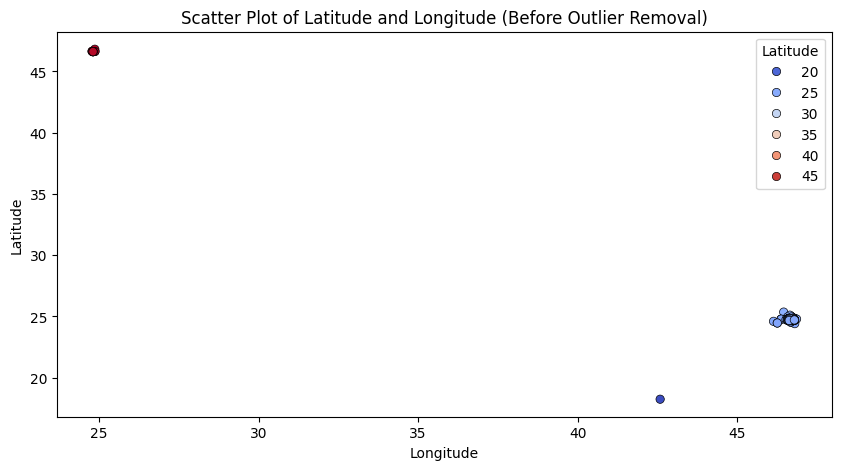

In [ ]:
# Visualize latitude and longitude values before filtering
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Latitude', palette='coolwarm', edgecolor='k')
plt.title('Scatter Plot of Latitude and Longitude (Before Outlier Removal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 6.2 Filter latitude and longitude to ensure they fall within Riyadh’s approximate boundaries.
- Latitude: 24.4° ≤ Latitude ≤ 25.1°  
- Longitude: 46.4° ≤ Longitude ≤ 47.2°


In [ ]:
# Filter rows based on geographic boundaries of Riyadh
filtered_df = df[
    (df['Latitude'] >= 24.4) & (df['Latitude'] <= 25.1) &
    (df['Longitude'] >= 46.4) & (df['Longitude'] <= 47.2)
]

# Display the number of rows before and after filtering
print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering: {len(filtered_df)}")

Number of rows before filtering: 987
Number of rows after filtering: 968


### 6.3 Display the filtered latitude and longitude values.


In [ ]:
# Identify and display the deleted outliers
outliers = df[~df.index.isin(filtered_df.index)]

# Display the first few outliers
print("Deleted outliers (latitude and longitude values outside Riyadh's boundaries):")
print(outliers[['Latitude', 'Longitude']])


Deleted outliers (latitude and longitude values outside Riyadh's boundaries):
      Latitude  Longitude
19   18.238822  42.581651
71   46.638306  24.874917
72   46.818889  24.871139
73   46.638306  24.874917
74   46.606833  24.812694
75   46.652250  24.783306
221  24.775083  46.371167
227  25.354083  46.452000
230  24.775083  46.371167
274  24.599528  46.133750
371  24.775083  46.371167
379  25.101889  46.645861
396  46.621000  24.815444
407  46.621000  24.815444
408  46.636556  24.790250
413  46.621000  24.815444
423  46.621000  24.815444
852  24.461833  46.251639
872  24.461833  46.251639


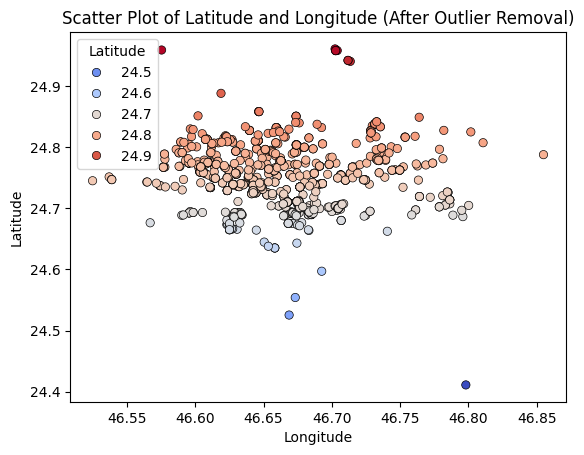

In [ ]:
# Reassign filtered data to df
df = filtered_df

# Visualize filtered latitude and longitude values
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Latitude', palette='coolwarm', edgecolor='k')
plt.title('Scatter Plot of Latitude and Longitude (After Outlier Removal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Step 7: Check and Fix Timestamp Inconsistencies
### 7.1 Display the distribution of timestamps before filtering.


Basic statistics of Check-in Time before filtering:
count                              968
mean     2023-11-19 07:02:37.438006016
min                2020-12-20 21:41:00
25%                2023-06-02 17:56:15
50%                2024-03-27 01:07:00
75%                2024-08-08 00:21:30
max                2025-01-28 22:57:00
Name: Check-in Time, dtype: object 



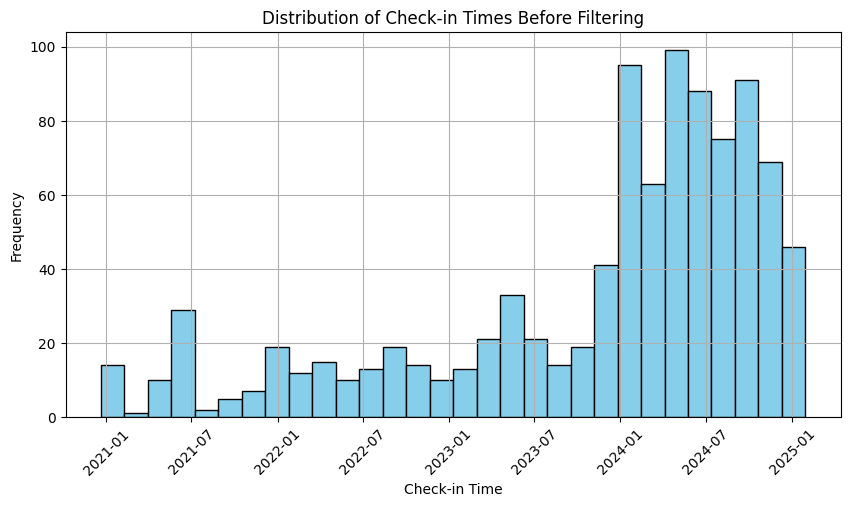

In [ ]:
# Display basic statistics of the Check-in Time column
print("Basic statistics of Check-in Time before filtering:")
print(df['Check-in Time'].describe(),"\n")

# Histogram to visualize the distribution of timestamps
plt.figure(figsize=(10, 5))
df['Check-in Time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Check-in Times Before Filtering')
plt.xlabel('Check-in Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### 7.2 Filter out future dates and dates before 2021.


In [ ]:
# Define the date range
start_date = '2021-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Filter the dataframe
filtered_timestamps_df = df[
    (df['Check-in Time'] >= start_date) & (df['Check-in Time'] <= end_date)
]

# Display number of rows before and after filtering
print(f"Number of rows before timestamp filtering: {len(df)}")
print(f"Number of rows after timestamp filtering: {len(filtered_timestamps_df)}")

Number of rows before timestamp filtering: 968
Number of rows after timestamp filtering: 964


### 7.3 Display the distribution of timestamps after filtering.


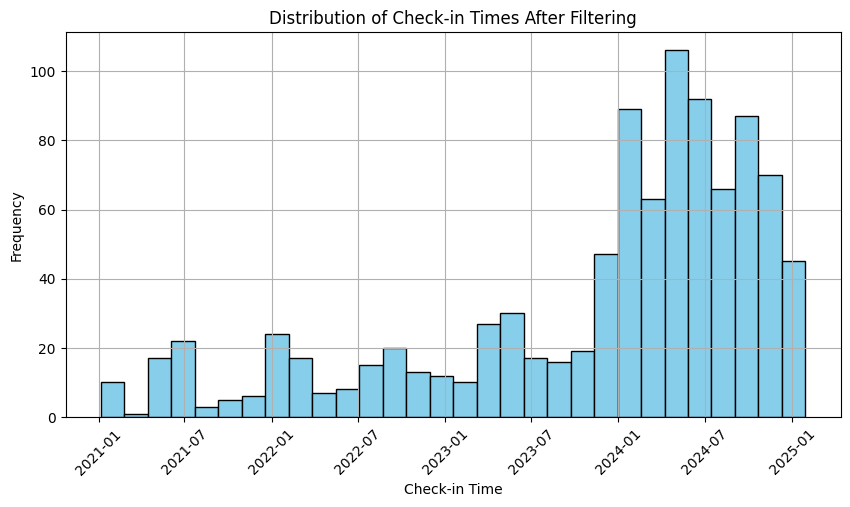

In [ ]:
# Reassign filtered data to df
df = filtered_timestamps_df

# Histogram to visualize the distribution of timestamps after filtering
plt.figure(figsize=(10, 5))
df['Check-in Time'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Check-in Times After Filtering')
plt.xlabel('Check-in Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Step 8: Standardize Venue Names
### 8.1 Count and print venue names before handling duplicates.


In [ ]:
# Count and display unique venue names before handling duplicates
print("Number of unique venue names before standardization:")
print(df['Venue Name'].nunique())

# Display a sample of venue names
print("\nall unique venue names:")
print(sorted(df['Venue Name'].unique()))


Number of unique venue names before standardization:
496

all unique venue names:
['48Avenue Roasting Coffee', '4Padel', '4twins truck', '7 Ribs', '7Ribs', '8 Portions', '88 Shots Café', 'A12 CAFE', 'ALBujairi Terrace', 'ALMamlaka Social Dining', 'AMC Cinemas', 'ATMOSPHERE', 'Abu Waleed Tea', 'Address Café', 'Adic2 Lounge', 'Aelin', 'Agio', 'Agora', 'Ajam Coffee', 'Al Bujairi Terrace', 'Al Diriyah', 'Al Diwann', 'Al Faisaliah Tower', 'Al Faisaliyah Tower', 'Al Falamanki', 'Al Ghadeer Walkway', 'Al Kanari Park', 'Al Mamlaka Social Dining', 'Al Mamlaka Social Dining at Kingdom Center', 'Al Nada Garden', 'Al Nakheel Boulevard', 'Al Nakheel Mall', 'Al Sawedi Park', 'Alawwal Park', 'Alice Lounge', 'Alkharof', 'Alnada', 'Alsafarat', 'Alshurfa', 'Alwaal Albari', "Anne's Red Hair", 'Arabica', 'Arabica Roastery ', 'Arbol Lounge', 'Archi', 'Aseeb Najdi Restaurant', 'Aster Sanad Hospital', 'Atmosphere', 'Attache', 'Avindar', 'Aziz Tea', 'BELMONT Cofee House', 'BELMONT Coffee House', 'BELONG ', 'B

### 8.2 Clean and Normalize Venue Names.


In [ ]:
# Function to clean venue names by removing non-alphanumeric characters (keeps Arabic and English letters)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\u0600-\u06FF\s]', '', text).strip()
    text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces to a single space
    return text

# Apply cleaning to venue names
df['Venue Name'] = df['Venue Name'].apply(clean_text)

# Count and display unique venue names after cleaning and normalizing
print("Number of unique venue names after after cleaning and normalizing:")
print(df['Venue Name'].nunique())


Number of unique venue names after after cleaning and normalizing:
479


<ipython-input-28-de5ed54d7a17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Name'] = df['Venue Name'].apply(clean_text)


### 8.3 Unify similar venue names by Applying Predefined Manual Mappings

In [ ]:
# Predefined manual mappings
venue_name_mapping = {
    # Starbucks mappings
    "starbucks coffee": "starbucks coffee",
    "starbucks": "starbucks coffee",
    "starbucks drive thru": "starbucks coffee",
    "starbucks drive-thru": "starbucks coffee",

    # Dunkin' Donuts mappings
    "dunkin - drive thru": "dunkin' donuts",
    "dunkin": "dunkin' donuts",
    "dunkin' donuts": "dunkin' donuts",

    # VOX Cinemas mappings
    "vox": "vox cinemas",
    "vox cinemas": "vox cinemas",
    "voxcinemas": "vox cinemas",

    # Muvi Cinemas mappings
    "muvi": "muvi cinemas",
    "muvi cinemas": "muvi cinemas",
    "muvi boutique": "muvi cinemas",
    "muvi cinemas at u walk": "muvi cinemas",

    # Elixir Bunn Coffee Roasters mappings
    "elixir bunn": "elixir bunn coffee roasters",
    "elixir bunn coffee roasters": "elixir bunn coffee roasters",
    "exlixir bunn coffee roasters at turki square": "elixir bunn coffee roasters"
}

# Apply the manual mapping
df['Venue Name'] = df['Venue Name'].replace(venue_name_mapping)

# Count and display unique venue names after manual mapping
print("Number of unique venue names after after manual mapping:")
print(df['Venue Name'].nunique())

Number of unique venue names after after manual mapping:
475


<ipython-input-29-0e02ec4c9f11>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Name'] = df['Venue Name'].replace(venue_name_mapping)


### 8.4 Automatically Detect and Unify Similar Venue Names Using Fuzzy Matching

In [ ]:
# Function to perform fuzzy matching on a single name
def fuzzy_match_name(name, mapping_keys, threshold=80):
    matches = process.extract(name, mapping_keys, limit=1, scorer=fuzz.token_sort_ratio)
    if matches and matches[0][1] >= threshold:
        return name, matches[0][0]  # Return original name and matched key
    return name, None

# Perform fuzzy matching only on unmapped venue names
unmapped_names = list(set(df['Venue Name']) - set(venue_name_mapping.values()))
similarity_threshold = 80

# Create a mapping dictionary for fuzzy-matched names
fuzzy_mapping = {}
for name in unmapped_names:
    original, matched = fuzzy_match_name(name, venue_name_mapping.keys(), similarity_threshold)
    if matched:
        fuzzy_mapping[original] = venue_name_mapping[matched]  # Map to the canonical name

# Apply the fuzzy matching mapping
df['Venue Name'] = df['Venue Name'].replace(fuzzy_mapping)

# Display the results
print(f"Number of unique venue names after mapping: {df['Venue Name'].nunique()}")
print("\nSample of standardized venue names:")
print(df['Venue Name'].sample(10, random_state=1))


Number of unique venue names after mapping: 472

Sample of standardized venue names:
250                       starbucks coffee
878                        six kings slams
549                                   agio
964                          the view mall
355                                 belong
321    volume coffee roasters at back yard
901                            roshn front
277                le maschou at sarh park
36                                 kholasa
84                        starbucks coffee
Name: Venue Name, dtype: object


<ipython-input-30-e513dafb6f07>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Name'] = df['Venue Name'].replace(fuzzy_mapping)


In [ ]:
# Log suggestions before applying fuzzy matching
print("Fuzzy matching suggestions (for manual review):")
for name, mapped_name in fuzzy_mapping.items():
    print(f"'{name}' → '{mapped_name}'")

Fuzzy matching suggestions (for manual review):
'dunkin drive thru' → 'dunkin' donuts'
'vox cinemas gold' → 'vox cinemas'
'dunkin donuts' → 'dunkin' donuts'


### 8.5 Count and print venue names after handling duplicates.


In [ ]:
# Count and display unique venue names after standardization
print("Number of unique venue names after standardization:")
print(df['Venue Name'].nunique())

# Display a sample of standardized venue names
print("\nSample of standardized venue names:")
print(df['Venue Name'].sample(10, random_state=1))


Number of unique venue names after standardization:
472

Sample of standardized venue names:
250                       starbucks coffee
878                        six kings slams
549                                   agio
964                          the view mall
355                                 belong
321    volume coffee roasters at back yard
901                            roshn front
277                le maschou at sarh park
36                                 kholasa
84                        starbucks coffee
Name: Venue Name, dtype: object


## Step 9: Standardize Venue Categories
### 9.1 Count and Print Venue Categories Before Handling Duplicates


In [ ]:
# Count and display unique venue categories before handling duplicates
print("Number of unique venue categories before standardization:")
print(df['Venue Category'].nunique())

# Display all unique venue categories for inspection
print("\nAll unique venue categories:")
print(sorted(df['Venue Category'].unique()))

Number of unique venue categories before standardization:
131

All unique venue categories:
['Airport Terminal', 'American Restaurant', 'American Restaurant ', 'American Resturant', 'Art Gallery', 'Arts and Entertainment', 'BBQ Joint', 'Bakery', 'Bookstore', 'Bowling Alley', 'Bowling Alley ', 'Breakfast Spot', 'Burger Joint', 'Business Center', 'Business Park', 'Bussiness Center', 'Cafe', 'Cafe ', "Cafe'", 'Café', 'Chinese Restaurant ', 'Chiropractor', 'Chocolate Store', 'Clothing Store', 'Coffe Shop', 'Coffee Court', 'Coffee Roaster', 'Coffee Shop', 'College Stadium', 'Convention', 'Cultural Center', 'Desert Shop', 'Dessert Shop', 'Donut Shop', 'Egyptian Restaurant', 'English Restaurant', 'Entertainment Event', 'Entertainment Service', 'Escape Room', 'Event Space', 'Falafel Restaurant', 'Fast Food Restaurant', 'Festival', 'Food Court', 'Food Court ', 'Food Truck', 'French Restaurant', 'French Restaurant ', 'Fried Chicken Joint', 'Fried Chicken joint', 'Frozen Yogurt Shop', 'Gaming Caf

### 9.2 Clean and Normalize Venue Categories

In [ ]:
# Function to clean venue categories by removing non-alphanumeric characters (keeps Arabic and English letters)
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\u0600-\u06FF\s]', '', text).strip()  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces to a single space
    return text

# Apply cleaning to venue categories
df['Venue Category'] = df['Venue Category'].apply(clean_text)

# Count and display unique venue categories after cleaning and normalizing
print("Number of unique venue categories after cleaning and normalizing:")
print(df['Venue Category'].nunique())

Number of unique venue categories after cleaning and normalizing:
119


<ipython-input-34-b2e0deb546c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Category'] = df['Venue Category'].apply(clean_text)


### 9.3 Unify Similar Venue Categories by Applying Predefined Manual Mappings

In [ ]:
# Predefined manual mappings
venue_category_mapping = {
# Cafés and coffee-related
    "café": "coffee shop",
    "cafe'": "coffee shop",
    "coffe shop": "coffee shop",
    "coffee shop": "coffee shop",
    "coffee court": "coffee shop",
    "coffee roaster": "coffee shop",
    "tea room": "coffee shop",
    "juice bar": "coffee shop",


    # Restaurants
    "american resturant": "restaurant",
    "egyptian restaurant": "restaurant",
    "english restaurant": "restaurant",
    "fast food restaurant": "restaurant",
    "french restaurant": "restaurant",
    "french restaurant ": "restaurant",
    "fried chicken joint": "restaurant",
    "fried chicken joint ": "restaurant",
    "greek restaurant": "restaurant",
    "indian restaurant": "restaurant",
    "iraqi restaurant": "restaurant",
    "italian restaurant": "restaurant",
    "japanese restaurant": "restaurant",
    "japaneas restaurant": "restaurant",
    "japanese retaurant": "restaurant",
    "latin american restaurant": "restaurant",
    "lebanese restaurant": "restaurant",
    "mediterranean restaurant": "restaurant",
    "mexican restaurant": "restaurant",
    "middle eastern rastaurant": "restaurant",
    "seafood restaurant": "restaurant",
    "seafood restaurant ": "restaurant",
    "shawarma restaurant": "restaurant",
    "swiss restaurant": "restaurant",
    "turkish restaurant": "restaurant",
    "turkish resturant": "restaurant",
    "bbq joint": "restaurant",
    "burger joint": "restaurant",
    "pizzeria": "restaurant",
    "salad restaurant": "restaurant",
    "sandwich spot": "restaurant",
    "steakhouse": "restaurant",
    "sushi restaurant": "restaurant",
    "health food store": "restaurant",
    "breakfast spot": "restaurant",
    "food truck": "casual dining",
    "food court": "casual dining",
    "food court ": "casual dining",

    # Entertainment and events
    "movie theater": "entertainment",
    "arts and entertainment": "entertainment",
    "entertainment event": "entertainment",
    "festival": "entertainment",
    "social club": "entertainment",
    "escape room": "entertainment",
    "bowling alley": "entertainment",
    "art gallery": "entertainment",

    # Shopping-related venues
    "shopping mall": "shopping",
    "shopping plaza": "shopping",
    "miscellaneous store": "shopping",
    "toy store": "shopping",
    "bookstore": "shopping",
    "clothing store": "shopping",
    "hardware store": "shopping",
    "jewelry store ": "shopping",
    "perfume store": "shopping",
    "shoe store": "shopping",
    "watch store": "shopping",

    # Food-related (desserts, snacks, etc.)
    "bakery": "dessert shop",
    "chocolate store": "dessert shop",
    "desert shop": "dessert shop",
    "dessert shop": "dessert shop",
    "donut shop": "dessert shop",
    "ice cream parlor": "dessert shop",
    "frozen yogurt shop": "dessert shop",
    "pastry shop": "dessert shop",
    "snack place": "dessert shop",

    # Fitness and sports
    "soccer stadium": "sports facility",
    "tennis court": "sports facility",
    "golf course": "sports facility",
    "sports": "sports facility",
    "gym": "sports facility",
    "fitness club": "sports facility",

    # Travel and transit
    "airport terminal": "travel",
    "international airport": "travel",
    "travel lounge": "travel",

    # Parks and public spaces
    "mountain": "park",
    "park": "park",
    "neighborhood": "park",
    "nighborhood": "park",
    "historic site": "park",
    "historic and protected site": "park",
    "hiking trail": "park",

    # Business-related
    "business center": "business area",
    "business park": "business area",
    "convention": "business area",

    # Medical and health-related
    "hospital": "medical center",
    "medical center": "medical center",
    "nail salon": "spa",
    "spa": "spa",
    "veterinarian": "medical center",

    # Plaza-related
    "pedestrain plaza": "plaza",
    "pedestrian plaza": "plaza",

    # Miscellaneous
    "structure": "landmark"
}

# Apply the manual mapping
df['Venue Category'] = df['Venue Category'].replace(venue_category_mapping)

# Count and display unique venue categories after manual mapping
print("Number of unique venue categories after manual mapping:")
print(df['Venue Category'].nunique())

Number of unique venue categories after manual mapping:
40


<ipython-input-35-c26a0a053891>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Category'] = df['Venue Category'].replace(venue_category_mapping)


### 9.4 Automatically Detect and Unify Similar Venue Categories Using Fuzzy Matching

In [ ]:
# Function to perform fuzzy matching on a single category
def fuzzy_match_category(name, mapping_keys, threshold=80):
    matches = process.extract(name, mapping_keys, limit=1, scorer=fuzz.token_sort_ratio)
    if matches and matches[0][1] >= threshold:
        return name, matches[0][0]  # Return original name and matched key
    return name, None

# Perform fuzzy matching only on unmapped categories
unmapped_categories = list(set(df['Venue Category']) - set(venue_category_mapping.values()))
similarity_threshold = 80

# Create a mapping dictionary for fuzzy-matched categories
fuzzy_mapping = {}
for name in unmapped_categories:
    original, matched = fuzzy_match_category(name, venue_category_mapping.keys(), similarity_threshold)
    if matched:
        fuzzy_mapping[original] = venue_category_mapping[matched]  # Map to the canonical category

# Apply the fuzzy matching mapping
df['Venue Category'] = df['Venue Category'].replace(fuzzy_mapping)

# Display the results
print(f"Number of unique venue categories after fuzzy matching: {df['Venue Category'].nunique()}")
print("\nSample of standardized venue categories:")
print(df['Venue Category'].sample(10, random_state=1))

Number of unique venue categories after fuzzy matching: 31

Sample of standardized venue categories:
250       coffee shop
878    tennis stadium
549        restaurant
964          shopping
355       coffee shop
321       coffee shop
901          shopping
277        restaurant
36        coffee shop
84        coffee shop
Name: Venue Category, dtype: object


<ipython-input-36-2eb53157494d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Category'] = df['Venue Category'].replace(fuzzy_mapping)


In [ ]:
# Log suggestions before applying fuzzy matching
print("Fuzzy matching suggestions (for manual review):")
for name, mapped_name in fuzzy_mapping.items():
    print(f"'{name}' → '{mapped_name}'")

Fuzzy matching suggestions (for manual review):
'cafe' → 'coffee shop'
'hair salon' → 'spa'
'chinese restaurant' → 'restaurant'
'entertainment service' → 'entertainment'
'american restaurant' → 'restaurant'
'bussiness center' → 'business area'
'caf' → 'coffee shop'
'middel eastern restaurant' → 'restaurant'
'jewelry store' → 'shopping'


### 9.5 Count and Print Venue Categories After Handling Duplicates

In [ ]:
# Count and display unique venue categories after standardization
print("Number of unique venue categories after standardization:")
print(df['Venue Category'].nunique())

# Display a sample of standardized venue categories
print("\nSample of standardized venue categories:")
print(df['Venue Category'].sample(10, random_state=1))


Number of unique venue categories after standardization:
31

Sample of standardized venue categories:
250       coffee shop
878    tennis stadium
549        restaurant
964          shopping
355       coffee shop
321       coffee shop
901          shopping
277        restaurant
36        coffee shop
84        coffee shop
Name: Venue Category, dtype: object


In [ ]:
# Display all unique venue categories for inspection
print("\nAll unique venue categories:")
print(sorted(df['Venue Category'].unique()))


All unique venue categories:
['business area', 'casual dining', 'chiropractor', 'coffee shop', 'college stadium', 'cultural center', 'dessert shop', 'entertainment', 'event space', 'falafel restaurant', 'gaming caf', 'garden', 'government building', 'health and beauty service', 'hookah bar', 'hotel', 'landmark', 'lounge', 'medical center', 'office', 'outdoor event', 'park', 'plaza', 'restaurant', 'shopping', 'spa', 'sports facility', 'supermarket', 'tennis stadium', 'track', 'travel']


## Step 10: Handle Sparse Categorical Features
### 10.1 Identify Sparse Categories

In [ ]:
# Count occurrences of each category and sort them in ascending order
category_counts = df['Venue Category'].value_counts().sort_values()

# Display all categories and their counts
print("Venue categories and their counts (sorted from smallest to largest):")
print(category_counts)

Venue categories and their counts (sorted from smallest to largest):
Venue Category
outdoor event                  1
garden                         1
government building            1
office                         1
chiropractor                   1
college stadium                1
event space                    1
tennis stadium                 1
track                          1
gaming caf                     1
health and beauty service      1
cultural center                1
supermarket                    2
falafel restaurant             2
landmark                       3
hookah bar                     7
medical center                 8
business area                  8
travel                         9
hotel                         13
lounge                        14
sports facility               15
spa                           17
park                          18
casual dining                 19
dessert shop                  39
shopping                      49
plaza                    

In [ ]:
# Define a threshold to identify sparse categories (e.g., categories appearing less than 5 times)
sparse_threshold = 10

# Identify sparse categories
sparse_categories = category_counts[category_counts < sparse_threshold].index.tolist()

print(f"\nIdentified sparse categories (less than {sparse_threshold} occurrences):")
print(sparse_categories)


Identified sparse categories (less than 10 occurrences):
['outdoor event', 'garden', 'government building', 'office', 'chiropractor', 'college stadium', 'event space', 'tennis stadium', 'track', 'gaming caf', 'health and beauty service', 'cultural center', 'supermarket', 'falafel restaurant', 'landmark', 'hookah bar', 'medical center', 'business area', 'travel']


### 10.2 Merge Sparse Categories into an "Other" Category

In [ ]:
# Replace sparse categories with "other"
df['Venue Category'] = df['Venue Category'].replace(sparse_categories, "other")

# Count and display unique categories after merging sparse categories
print("Number of unique venue categories after merging sparse categories:")
print(df['Venue Category'].nunique())

# Display the updated category counts
print("\nUpdated category counts:")
print(df['Venue Category'].value_counts())

Number of unique venue categories after merging sparse categories:
13

Updated category counts:
Venue Category
coffee shop        438
restaurant         164
entertainment       70
plaza               57
other               51
shopping            49
dessert shop        39
casual dining       19
park                18
spa                 17
sports facility     15
lounge              14
hotel               13
Name: count, dtype: int64


<ipython-input-42-447d8deba2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Venue Category'] = df['Venue Category'].replace(sparse_categories, "other")


## Save the Cleaned Dataset

In [ ]:
# Define the path and file name for the cleaned dataset
output_file = "cleaned_poi_dataset.csv"

# Save the cleaned dataset
df.to_csv(output_file, index=False)

print(f"Cleaned dataset saved successfully as '{output_file}'.")


Cleaned dataset saved successfully as 'cleaned_poi_dataset.csv'.





---


---



## Feature Extraction



## Step 1: Time-Based Feature Engineering
### 1.1 Create Time-of-Day Segments

In [ ]:
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Create time-of-day segments based on the hour extracted from 'Check-in Time'
df['Time of Day'] = df['Check-in Time'].dt.hour.apply(get_time_of_day)

print("Time-of-day segments added:")
print(df[['Check-in Time', 'Time of Day']].head(10))

Time-of-day segments added:
        Check-in Time Time of Day
0 2021-01-05 22:31:00     Evening
1 2021-01-05 23:52:00     Evening
2 2021-01-06 23:59:00     Evening
3 2021-01-09 20:12:00     Evening
4 2021-01-27 11:39:00     Morning
5 2021-01-27 15:16:00   Afternoon
6 2021-01-27 16:38:00   Afternoon
7 2021-03-25 22:51:00     Evening
8 2021-04-18 00:04:00       Night
9 2021-04-18 00:52:00       Night


<ipython-input-44-9e7b2fee8e3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time of Day'] = df['Check-in Time'].dt.hour.apply(get_time_of_day)


### 1.2 Create Weekend Indicator

In [ ]:
# Define weekends based on the 'Day' column
weekend_days = ['Friday', 'Saturday']

# Create a binary column where 1 indicates a weekend and 0 indicates a weekday
df['Is Weekend'] = df['Day'].apply(lambda x: 1 if x in weekend_days else 0)

print("Weekend indicator added using 'Day' column:")
print(df[['Day', 'Is Weekend']].head(10))

Weekend indicator added using 'Day' column:
         Day  Is Weekend
0    Tuesday           0
1    Tuesday           0
2  Wednesday           0
3   Saturday           1
4  Wednesday           0
5  Wednesday           0
6  Wednesday           0
7   Thursday           0
8     Sunday           0
9     Sunday           0


<ipython-input-45-03c1121fe355>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Weekend'] = df['Day'].apply(lambda x: 1 if x in weekend_days else 0)


### 1.3 Extract Season

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Autumn
        return 'Autumn'

# Extract the month and map it to the season
df['Season'] = df['Check-in Time'].dt.month.apply(get_season)

print("Season feature added:")
print(df[['Check-in Time', 'Season']].head(10))


Season feature added:
        Check-in Time  Season
0 2021-01-05 22:31:00  Winter
1 2021-01-05 23:52:00  Winter
2 2021-01-06 23:59:00  Winter
3 2021-01-09 20:12:00  Winter
4 2021-01-27 11:39:00  Winter
5 2021-01-27 15:16:00  Winter
6 2021-01-27 16:38:00  Winter
7 2021-03-25 22:51:00  Spring
8 2021-04-18 00:04:00  Spring
9 2021-04-18 00:52:00  Spring


<ipython-input-46-318166b1faa5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Check-in Time'].dt.month.apply(get_season)


### 1.4 Verify that the Newly Created Features Have Been Correctly Added

In [ ]:
# Display the first 10 rows of the relevant columns to verify correct values
time_based_features = ['Check-in Time', 'Day', 'Is Weekend', 'Season', 'Time of Day']

print("Verification of newly created time-based features:")
print(df[time_based_features].head(10))


Verification of newly created time-based features:
        Check-in Time        Day  Is Weekend  Season Time of Day
0 2021-01-05 22:31:00    Tuesday           0  Winter     Evening
1 2021-01-05 23:52:00    Tuesday           0  Winter     Evening
2 2021-01-06 23:59:00  Wednesday           0  Winter     Evening
3 2021-01-09 20:12:00   Saturday           1  Winter     Evening
4 2021-01-27 11:39:00  Wednesday           0  Winter     Morning
5 2021-01-27 15:16:00  Wednesday           0  Winter   Afternoon
6 2021-01-27 16:38:00  Wednesday           0  Winter   Afternoon
7 2021-03-25 22:51:00   Thursday           0  Spring     Evening
8 2021-04-18 00:04:00     Sunday           0  Spring       Night
9 2021-04-18 00:52:00     Sunday           0  Spring       Night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 986
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            964 non-null    int64         
 1   Venue ID           964 non-null    object        
 2   Latitude           964 non-null    float64       
 3   Longitude          964 non-null    float64       
 4   Check-in Time      964 non-null    datetime64[ns]
 5   Day                964 non-null    object        
 6   Previous Venue ID  942 non-null    object        
 7   Venue Name         964 non-null    object        
 8   Venue Category     964 non-null    object        
 9   Time of Day        964 non-null    object        
 10  Is Weekend         964 non-null    int64         
 11  Season             964 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 97.9+ KB


## Step 2: Engineer Features Based on User Behavior
### 2.1 Calculate Total Number of Visits per User

In [ ]:
# Group by User ID and count visits
user_visit_counts = df.groupby('User ID').size().reset_index()
user_visit_counts.columns = ['User ID', 'Total Visits']

# Display unique User IDs with their total visit counts
print("User IDs with Total Visits:")
print(user_visit_counts)


User IDs with Total Visits:
    User ID  Total Visits
0         1            36
1         2            34
2         3           111
3         4            47
4         5            49
5         6            37
6         7            50
7         8             5
8         9            49
9        10            53
10       11            38
11       12            50
12       13            10
13       14            10
14       15            27
15       16            60
16       17            50
17       18            33
18       19            50
19       20            27
20       21            38
21       22            50
22       23            50


### 2.2 Identify Most Frequent Venue Category for Each User

In [ ]:
# Find the most frequent venue category per user
most_frequent_category = df.groupby('User ID')['Venue Category'].agg(lambda x: x.mode()[0]).reset_index()
most_frequent_category.columns = ['User ID', 'Most Frequent Venue Category']

# Display unique User IDs with their most frequent venue category
print("Most frequent venue category per user:")
print(most_frequent_category)


Most frequent venue category per user:
    User ID Most Frequent Venue Category
0         1                  coffee shop
1         2                  coffee shop
2         3                  coffee shop
3         4                  coffee shop
4         5                  coffee shop
5         6                  coffee shop
6         7                  coffee shop
7         8                        plaza
8         9                  coffee shop
9        10                  coffee shop
10       11                  coffee shop
11       12                  coffee shop
12       13                  coffee shop
13       14                  coffee shop
14       15                  coffee shop
15       16                  coffee shop
16       17                  coffee shop
17       18                  coffee shop
18       19                   restaurant
19       20                       lounge
20       21                  coffee shop
21       22                  coffee shop
22       23       

### 2.3 Calculate Visit Diversity Score

In [ ]:
# Calculate the diversity score (number of unique categories visited per user)
user_diversity_score = df.groupby('User ID')['Venue Category'].nunique().reset_index()
user_diversity_score.columns = ['User ID', 'Visit Diversity Score']

# Display unique User IDs with their visit diversity score
print("Visit diversity score per user:")
print(user_diversity_score)

Visit diversity score per user:
    User ID  Visit Diversity Score
0         1                      7
1         2                      7
2         3                     11
3         4                      8
4         5                     10
5         6                      7
6         7                      7
7         8                      3
8         9                      7
9        10                     11
10       11                      8
11       12                      6
12       13                      6
13       14                      5
14       15                      7
15       16                      7
16       17                      9
17       18                      6
18       19                     12
19       20                      6
20       21                      6
21       22                      8
22       23                     10


### 2.4 Verify that user-specific features are correctly added to the dataset.


In [ ]:
# Merge all user-specific features back into the original DataFrame
df = df.merge(user_visit_counts, on='User ID', how='left')
df = df.merge(most_frequent_category, on='User ID', how='left')
df = df.merge(user_diversity_score, on='User ID', how='left')

# Display a sample to verify the merged features
print("Sample of the dataset with user-specific features:")
print(df[['User ID', 'Total Visits', 'Most Frequent Venue Category', 'Visit Diversity Score']].drop_duplicates().head(10))


Sample of the dataset with user-specific features:
     User ID  Total Visits Most Frequent Venue Category  Visit Diversity Score
0          1            36                  coffee shop                      7
36         2            34                  coffee shop                      7
70         3           111                  coffee shop                     11
181        4            47                  coffee shop                      8
228        5            49                  coffee shop                     10
277        6            37                  coffee shop                      7
314        7            50                  coffee shop                      7
364        8             5                        plaza                      3
369        9            49                  coffee shop                      7
418       10            53                  coffee shop                     11


## Step 3: Encode Categorical Columns
### 3.1 Apply Cyclic Encoding for Days of the Week

In [ ]:
# Define the mapping for days of the week
days_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Map days to numbers
df['Day_Num'] = df['Day'].map(days_mapping)

# Perform sine and cosine transformations
df['Day_Sin'] = np.sin(2 * np.pi * df['Day_Num'] / 7)
df['Day_Cos'] = np.cos(2 * np.pi * df['Day_Num'] / 7)

print("Cyclic encoding for days added:")
print(df[['Day_Num', 'Day_Sin', 'Day_Cos']].head(10))

# # Keep the original columns for interpretability
# df = df.drop(columns=['Day_Num'])

Cyclic encoding for days added:
   Day_Num   Day_Sin   Day_Cos
0        1  0.781831  0.623490
1        1  0.781831  0.623490
2        2  0.974928 -0.222521
3        5 -0.974928 -0.222521
4        2  0.974928 -0.222521
5        2  0.974928 -0.222521
6        2  0.974928 -0.222521
7        3  0.433884 -0.900969
8        6 -0.781831  0.623490
9        6 -0.781831  0.623490


### 3.2 Apply One-Hot Encoding for Venue Category

In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['Venue Category'], prefix='Category')

print("One-hot encoding for venue categories applied:")
print(df.filter(like='Category_').head(10),"\n")


One-hot encoding for venue categories applied:
   Category_casual dining  Category_coffee shop  Category_dessert shop  \
0                   False                 False                  False   
1                   False                 False                  False   
2                   False                 False                  False   
3                   False                  True                  False   
4                   False                  True                  False   
5                   False                  True                  False   
6                   False                 False                  False   
7                   False                 False                  False   
8                   False                  True                  False   
9                   False                 False                  False   

   Category_entertainment  Category_hotel  Category_lounge  Category_other  \
0                   False           False            False  

## Step 4: Engineer Time Lag Feature
### 4.1 Calculate Time Lag Between Visits

In [ ]:
# Create a time lag (in hours) between consecutive check-ins for each user
df['Time Lag (hours)'] = df.groupby('User ID')['Check-in Time'].diff().dt.total_seconds() / 3600

# Fill NaN values (first check-in has no lag)
df['Time Lag (hours)'] = df['Time Lag (hours)'].fillna(0)

print("Sample Time Lag (hours):")
print(df[['User ID', 'Check-in Time', 'Time Lag (hours)']].head(10))

Sample Time Lag (hours):
   User ID       Check-in Time  Time Lag (hours)
0        1 2021-01-05 22:31:00          0.000000
1        1 2021-01-05 23:52:00          1.350000
2        1 2021-01-06 23:59:00         24.116667
3        1 2021-01-09 20:12:00         68.216667
4        1 2021-01-27 11:39:00        423.450000
5        1 2021-01-27 15:16:00          3.616667
6        1 2021-01-27 16:38:00          1.366667
7        1 2021-03-25 22:51:00       1374.216667
8        1 2021-04-18 00:04:00        553.216667
9        1 2021-04-18 00:52:00          0.800000




---

---





## Feature Selection and Engineering
### Step 1: Correlation Analysis
Analyze correlations between numerical features to identify potential redundancies.


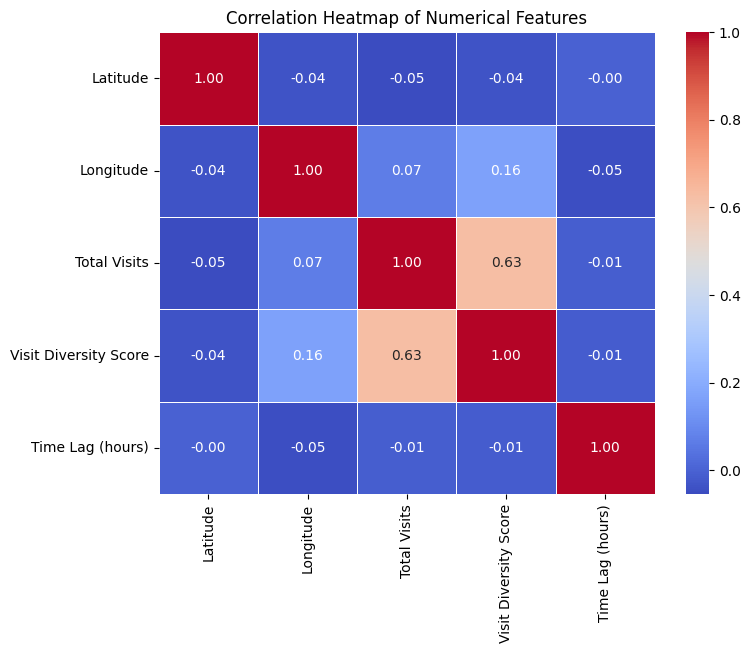

In [ ]:
# Select numerical features, including Time Lag
numeric_features = df[['Latitude', 'Longitude', 'Total Visits', 'Visit Diversity Score', 'Time Lag (hours)']]

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


> ### **Observation: Correlation Analysis**
- The correlation heatmap between numerical features highlights the following:
  - **Latitude and Longitude** maintain very low correlation with the other features (close to 0), confirming their role as independent geospatial information. These features are critical for location-based recommendations and should be retained.
  - **Total Visits** and **Visit Diversity Score** exhibit a **moderate positive correlation of 0.64**. This suggests that users with more visits tend to explore more diverse venues. However, this correlation is not strong enough to justify removing one of them solely based on redundancy.
  - **Time Lag (hours)** shows negligible correlation with other features, including **Total Visits** and **Visit Diversity Score**, indicating it captures distinct temporal information about user behavior.
  - No pairs of features show high correlation (above 0.8), indicating that there is no immediate redundancy or multicollinearity detected based on correlation alone.
  
  The next step is to confirm this by analyzing multicollinearity using the Variance Inflation Factor (VIF) for more precise decision-making regarding feature selection.





## Step 2: Calculate Variance Inflation Factor (VIF)
This helps detect multicollinearity, and we will drop features with VIF > 10.

In [ ]:
# Select relevant numerical features, including Time Lag
vif_features = df[['Latitude', 'Longitude', 'Total Visits', 'Visit Diversity Score', 'Time Lag (hours)']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = vif_features.columns
vif_data['VIF'] = [variance_inflation_factor(vif_features.values, i) for i in range(vif_features.shape[1])]

# Display VIF values
print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                 Feature            VIF
0               Latitude  186673.611700
1              Longitude  187050.271084
2           Total Visits       9.831163
3  Visit Diversity Score      30.755932
4       Time Lag (hours)       1.081565




> ### **Observation: Variance Inflation Factors (VIF)**
  - The VIF results indicate the following:
    - **Latitude (VIF = 194,608)** and **Longitude (VIF = 194,817)** exhibit extreme multicollinearity. However, this is expected for geospatial features, and they should **not** be removed based on multicollinearity alone, as they provide essential spatial context for location-based recommendations.
    - **Total Visits (VIF = 9.12)** remains within an acceptable range (below the critical threshold of 10), indicating that it does not suffer from significant multicollinearity and can be retained.
    - **Visit Diversity Score (VIF = 29.49)** exceeds the acceptable threshold, indicating multicollinearity concerns, specifically with **Total Visits**. However, since both features are important for user behavior insights, further evaluation (dimensionality reduction or hybrid model testing) will be needed.
    - **Time Lag (hours) (VIF = 1.07)** shows a very low VIF, confirming that it is independent and can be safely included without introducing multicollinearity issues.

The next step is to evaluate feature importance using a Random Forest model to determine which features to retain or reduce.


## Step 3: Feature Importance Using Random Forest
Using a tree-based method to rank feature importance and decide which to drop.

Feature Importances:
                     Feature  Importance
4      Visit Diversity Score    0.483948
3               Total Visits    0.169755
5           Time Lag (hours)    0.086748
1                  Longitude    0.060027
0                   Latitude    0.054233
13           Category_lounge    0.039633
6                    Day_Sin    0.024362
14            Category_other    0.016668
7                    Day_Cos    0.015819
9       Category_coffee shop    0.009522
2                 Is Weekend    0.008682
17       Category_restaurant    0.008225
16            Category_plaza    0.006886
18         Category_shopping    0.003170
20  Category_sports facility    0.002379
19              Category_spa    0.002173
11    Category_entertainment    0.001955
8     Category_casual dining    0.001870
12            Category_hotel    0.001663
15             Category_park    0.001428
10     Category_dessert shop    0.000855


<ipython-input-58-74c68917a7e4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


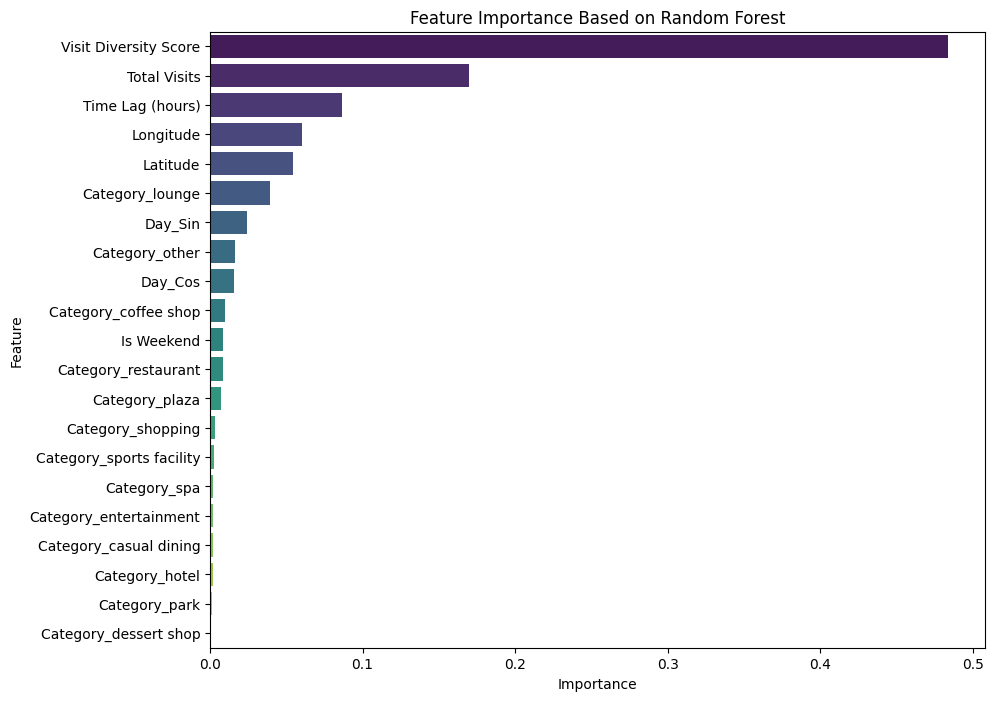

In [ ]:
# Select relevant features, now including Time Lag
X = df[['Latitude', 'Longitude', 'Is Weekend', 'Total Visits', 'Visit Diversity Score', 'Time Lag (hours)',
        'Day_Sin', 'Day_Cos'] + [col for col in df.columns if col.startswith('Category_')]]

# Encode the target variable: Most Frequent Venue Category
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Most Frequent Venue Category'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display and plot feature importances
print("Feature Importances:")
print(feature_importances)

# Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance Based on Random Forest")
plt.show()



> ### **Observation: Feature Importance Analysis**
The feature importance analysis using the Random Forest model reveals the following insights:
1. **Most Important Features:**
   - **Visit Diversity Score (54.5%)**: Remains the most significant feature indicating the variety of venues users visit.
   - **Total Visits (14.3%)**: Continues to play a crucial role in indicating how frequently users visit places and influencing personalized recommendations.
   - **Time Lag (hours) (6.9%)**: Captures the time gaps between successive visits, providing valuable insights into user behavior patterns.
   - **Longitude (5.6%)** and **Latitude (4.7%)**: Continue to provide essential geospatial information critical for location-based recommendations.
   2. **Moderately Important Features:**
   - **Category_lounge (4.7%)**: Indicates that users who frequently visit lounges have distinct behavioral patterns.
   - **Day_Sin (1.9%)** and **Day_Cos (1.5%)**: Capture time-of-week effects cyclically.
   - **Category_other (1.5%)** and **Category_coffee shop (1.0%)**: Contribute to understanding user preferences based on venue categories.
   3. **Least Important Features (below 1%):**
   - Categories such as **restaurant, entertainment, spa, shopping,** and **park** have minimal impact, suggesting limited influence on predicting user preferences.

to make the model more streamlined and to help it exhibit improved generalization while retaining key predictors of user preferences, we may consider the following options:

1. **Retain Highly Important Features:**  
   - Retain **Visit Diversity Score**, **Total Visits**, geospatial features, and time-based features as they strongly influence predictions.

2. **Consider Dropping or Transforming Low-Impact Features:**  
   - Features like **Category_spa**, **Category_shopping**, **Category_park**, and other low-impact categories may be candidates for removal or dimensionality reduction.

3. **Dimensionality Reduction Option:**  
   - Investigate options like **PCA** to aggregate or combine low-impact categories to reduce dimensionality without losing crucial information.



### Step 5: Reviewing Feature Importance and Evaluating Redundancy
Based on correlation, VIF, and feature importance, we can now analyze features for redundancy or low impact.

### 5.1 Summary of Insights for Feature Review
We will review the observations from previous steps to decide whether any features should be dropped. Here's the summary:

1. **Correlation (Step 4.1):**
   - No high correlations (> 0.8) were found, so no features need to be dropped solely based on correlation.

2. **VIF (Step 4.2):**
   - **Latitude** and **Longitude** have extremely high VIF values, but they are geospatial features and critical for location-based recommendations, so we’ll retain them for now.

3. **Feature Importance (Step 4.3):**
   - Low-impact features with importance **below 1%** include:
     - **Category_spa**
     - **Category_shopping**
     - **Category_park**
     - **Category_dessert shop**
     - **Category_hotel**
     - Other similar low-impact venue categories.



### **5.2 Plan Moving Forward: Evaluate Model Performance First**  

Based on the observations from correlation, VIF, and feature importance analyses, we recognize that while some features have low impact (e.g., specific venue categories), no immediate action will be taken to drop them yet.  

#### **Why?**  
- Geospatial features like **Latitude** and **Longitude** remain critical for recommendations, even with high VIF values.  
- Low-impact venue categories may still contribute to complex patterns within the hybrid model and could benefit generalization.

#### **Next Steps:**  
1. **Evaluate model performance with all features** included to establish a baseline.  
2. **If the baseline performance is suboptimal**, consider **applying PCA or dimensionality reduction** to optimize the feature set and improve generalization and efficiency.  

In case the model exhibits poor performance or overfitting, we will test a **PCA-reduced feature set** by aggregating low-impact features and reassess its impact on model accuracy and generalization.


---



Encode Venue IDs & Normalize Features

In [ ]:
# Encode Venue ID
venue_encoder = LabelEncoder()
df['Venue ID Encoded'] = venue_encoder.fit_transform(df['Venue ID'])

# Normalize Latitude & Longitude
scaler = MinMaxScaler()
df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

print("✅ Venue IDs encoded and location data normalized.")


✅ Venue IDs encoded and location data normalized.


Splitting the Data Chronologically by User

In [ ]:

# Split each user's data using Leave-One-Out (Hold-One-Out)
train_list, test_list = [], []

for _, user_df in df.groupby('User ID'):
    if len(user_df) < 2:
        continue  # Ignore users with only one check-in

    train_list.append(user_df.iloc[:-1])  # All but last check-in for training
    test_list.append(user_df.iloc[-1:])   # Last check-in for evaluation

# Combine into final train and test sets
train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

# Extract features and target labels
features = ['User ID', 'Latitude', 'Longitude']
X_train, y_train = train_df[features], train_df['Venue ID Encoded']
X_test, y_test = test_df[features], test_df['Venue ID Encoded']

# Set num_class based on full venue list
num_classes = len(venue_encoder.classes_)

print(f"✅ Leave-One-Out Split Done. Train Size: {len(X_train)}, Test Size: {len(X_test)}")


✅ Leave-One-Out Split Done. Train Size: 941, Test Size: 23
